# Pilot Exploration Document
This document aim to do some basic analysis for the flight data set and check the possibility of doing the Flight Manger project

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

## Read the data of 2017

In [2]:
df1 = pd.read_csv("573883308_T_ONTIME_1.csv")
df2 = pd.read_csv("573883308_T_ONTIME_3.csv")
df1 = df1.append(df2)
delayed_df = df1.loc[df1['DEP_DEL15'] == 1]

Check the flight frequency by day of week. From the result we can see that the amount varies in a week. Check the percentage of delay, we can see that it is kind of correlated with the total number of flights, which means busy days could have higher rates of delay.

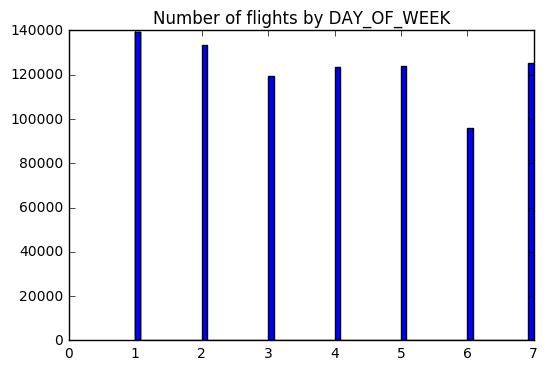

In [28]:
plt.hist(df1.DAY_OF_WEEK, bins='auto') 
plt.title("Number of flights by DAY_OF_WEEK")
plt.show()

In [26]:
freq_delay_day = Counter(delayed_df.DAY_OF_WEEK)
freq_day = Counter(df1.DAY_OF_WEEK)

freq1 = []
freq2 = []
for i in freq_delay_day.values():
    freq1.append(i)
for i in freq_day.values():
    freq2.append(i)

rate = []
for i in range(7): 
    rate.append(freq1[i]/freq2[i])

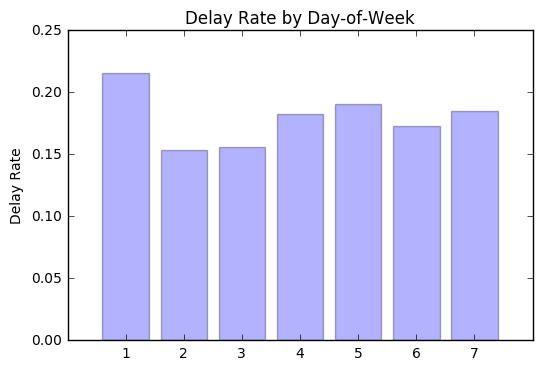

In [29]:
y_pos = range(7)
plt.bar(y_pos, rate, align='center',alpha = 0.3)
plt.xticks(y_pos, range(1,8))
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Day-of-Week')
plt.show()

Carriers's performance varies.

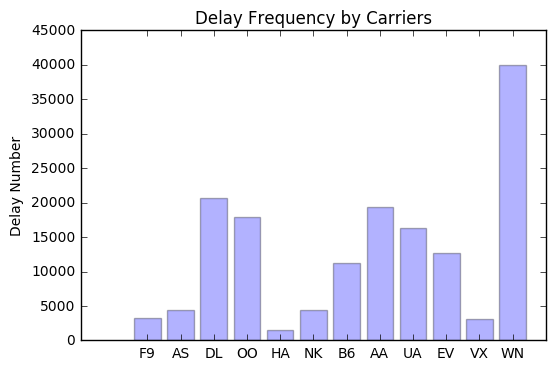

In [40]:
freq_carrier_delay = Counter(delayed_df.UNIQUE_CARRIER)
freq = []
carrier =[]
for i in freq_carrier_delay.values():
    freq.append(i)
    
for i in freq_carrier_delay.keys():
    carrier.append(i)

y_pos = range(len(carrier))
plt.bar(y_pos, freq, align='center',alpha = 0.3)
plt.xticks(y_pos, carrier)
plt.ylabel('Delay Number')
plt.title('Delay Frequency by Carriers')
plt.show()

In [37]:
freq_carrier = Counter(df1.UNIQUE_CARRIER)
freq2 = []
for i in freq_carrier.values():
    freq2.append(i)
rate = []
for i in range(len(freq2)):
    rate.append(freq[i]/freq2[i])

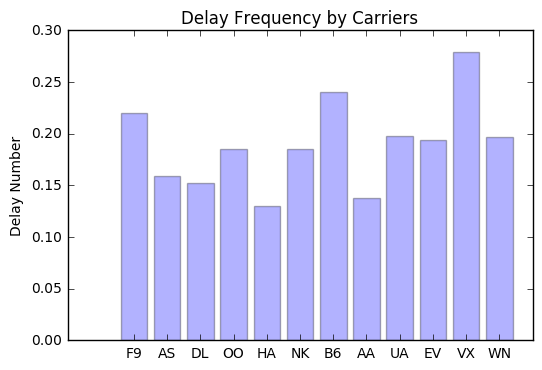

In [38]:
y_pos = range(len(carrier))
plt.bar(y_pos, rate, align='center',alpha = 0.3)
plt.xticks(y_pos, carrier)
plt.ylabel('Delay Number')
plt.title('Delay Frequency by Carriers')
plt.show()

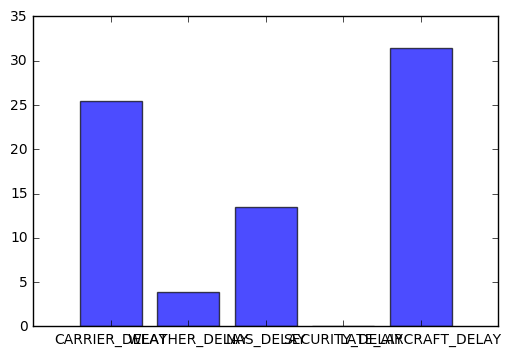

In [44]:
delay_type = delayed_df[['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY',
                         'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].dropna()
mean_cause = delay_type.mean(axis=0)
mean_cause.keys()
y_pos = range(len(mean_cause.values))
plt.bar(y_pos,mean_cause.values, align='center',alpha = 0.7)
plt.xticks(y_pos, mean_cause.keys())
plt.show()

Most delay time is caused by carrier and aircraft, which doesn't mean this two reason happend most. May just because it cause longer time when I happened. Let's check the major cause of the delay as below:

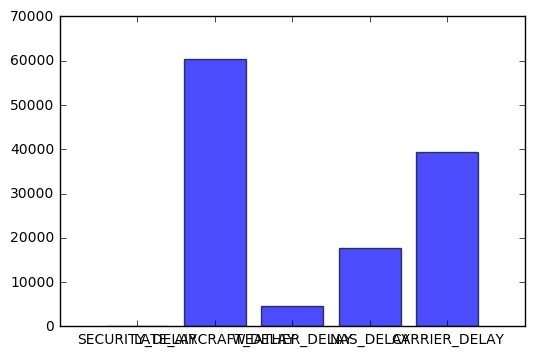

In [48]:
freq_delay = Counter(delay_type.idxmax(axis=1))
cause = []
freq = []
for i in freq_delay.values():
    freq.append(i)

for i in freq_delay.keys():
    cause.append(i)
y_pos = range(len(cause))
plt.bar(y_pos,freq, align='center',alpha = 0.7)
plt.xticks(y_pos,cause)
plt.show()

In [49]:
freq_delay

Counter({'CARRIER_DELAY': 39454,
         'LATE_AIRCRAFT_DELAY': 60401,
         'NAS_DELAY': 17704,
         'SECURITY_DELAY': 186,
         'WEATHER_DELAY': 4615})

Late Aircraft are the major cause of most delay, which shows the importance to consider where the current flight is. It can be get by tracking the tail number of flight.